![dance party](dance_party.jpg)

# Which songs are most suitable for a dancing party?

## 📖 Background
It's that vibrant time of year again - Summer has arrived (for those of us in the Northern Hemisphere at least)! There's an energy in the air that inspires us to get up and move. In sync with this exuberance, your company has decided to host a dance party to celebrate. And you, with your unique blend of creativity and analytical expertise, have been entrusted with the crucial task of curating a dance-themed playlist that will set the perfect mood for this electrifying night. The question then arises - How can you identify the songs that would make the attendees dance their hearts out? This is where your coding skills come into play.

## 💾 The Data
You have assembled information on more than `125` genres of Spotify music tracks in a file called `spotify.csv`, with each genre containing approximately `1000` tracks. All tracks, from all time, have been taken into account without any time period limitations. However, the data collection was concluded in `October 2022`.
Each row represents a track that has some audio features associated with it.

| Column     | Description              |
|------------|--------------------------|
| `track_id` | The Spotify ID number of the track. |
| `artists` | Names of the artists who performed the track, separated by a `;` if there's more than one.|
| `album_name` | The name of the album that includes the track.|
| `track_name` | The name of the track.|
| `popularity` | Numerical value ranges from `0` to `100`, with `100` being the highest popularity. This is calculated based on the number of times the track has been played recently, with more recent plays contributing more to the score. Duplicate tracks are scored independently.|
| `duration_ms` | The length of the track, measured in milliseconds.|
| `explicit` | Indicates whether the track contains explicit lyrics. `true` means it does, `false` means it does not or it's unknown.|
| `danceability` | A score ranges between `0.0` and `1.0` that represents the track's suitability for dancing. This is calculated by algorithm and is determined by factors like tempo, rhythm stability, beat strength, and regularity.|
| `energy` | A score ranges between `0.0` and `1.0` indicating the track's intensity and activity level. Energetic tracks tend to be fast, loud, and noisy.|
| `key` | The key the track is in. Integers map to pitches using standard Pitch class notation. E.g.`0 = C`, `1 = C♯/D♭`, `2 = D`, and so on. If no key was detected, the value is `-1`.| 
| `loudness` | The overall loudness, measured in decibels (dB).|
| `mode` |  The modality of a track, represented as `1` for major and `0` for minor.| 
| `speechiness` | Measures the amount of spoken words in a track. A value close to `1.0` denotes speech-based content, while `0.33` to `0.66` indicates a mix of speech and music like rap. Values below `0.33` are usually music and non-speech tracks.| 
| `acousticness` | A confidence measure ranges from `0.0` to `1.0`, with `1.0` representing the highest confidence that the track is acoustic.|
| `instrumentalness` | Instrumentalness estimates the likelihood of a track being instrumental. Non-lyrical sounds such as "ooh" and "aah" are considered instrumental, whereas rap or spoken word tracks are classified as "vocal". A value closer to `1.0` indicates a higher probability that the track lacks vocal content.|
| `liveness` | A measure of the probability that the track was performed live. Scores above `0.8` indicate a high likelihood of the track being live.|
| `valence` | A score from `0.0` to `1.0` representing the track's positiveness. High scores suggest a more positive or happier track.|
| `tempo` | The track's estimated tempo, measured in beats per minute (BPM).|
| `time_signature` | An estimate of the track's time signature (meter), which is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from `3` to `7` indicating time signatures of `3/4`, to `7/4`.|
| `track_genre` |  The genre of the track.|

[Source](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset) (data has been modified)

## 💪 Challenge
Your task is to devise an analytically-backed, dance-themed playlist for the company's summer party. Your choices must be justified with a comprehensive report explaining your methodology and reasoning. Below are some suggestions on how you might want to start curating the playlist:
* Use descriptive statistics and data visualization techniques to explore the audio features and understand their relationships.
* Develop and apply a machine learning model that predicts a song's `danceability`. 
* Interpret the model outcomes and utilize your data-driven insights to curate your ultimate dance party playlist of the top 50 songs according to your model.

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sns.set_style('whitegrid')

In [2]:
spotify = pd.read_csv('data/spotify.csv')
spotify.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666.0,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610.0,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826.0,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933.0,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853.0,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
# key variables
top = 20 # Top-n list
TARGET_GENRE = 'indie-pop'

In [4]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113027 entries, 0 to 113026
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113027 non-null  object 
 1   artists           113026 non-null  object 
 2   album_name        113026 non-null  object 
 3   track_name        113026 non-null  object 
 4   popularity        113027 non-null  int64  
 5   duration_ms       113027 non-null  float64
 6   explicit          113027 non-null  bool   
 7   danceability      113027 non-null  float64
 8   energy            113027 non-null  float64
 9   key               113027 non-null  int64  
 10  loudness          113027 non-null  float64
 11  mode              113027 non-null  int64  
 12  speechiness       113027 non-null  float64
 13  acousticness      113027 non-null  float64
 14  instrumentalness  113027 non-null  float64
 15  liveness          113027 non-null  float64
 16  valence           11

# Preparation

In [5]:
df = spotify.copy()

## Drop duplicates

In [6]:
original_shape = df.shape[0]
df = df.drop_duplicates().reset_index(drop = True)
print(f"{original_shape - df.shape[0]} rows dropped")

444 rows dropped


## Drop nulls

In [7]:
original_shape = df.shape[0]
df = df.dropna().reset_index(drop = True)
print(f"{original_shape - df.shape[0]} rows dropped")

1 rows dropped


## Rename artists column

In [8]:
def reorder_text(text, delimiter):
    text = " ".join(text.split())
    array = text.split(";")
    array = list(map(str.strip, array))
    array.sort()
    return ";".join(array)

In [9]:
df['artists'] = df['artists'].apply(reorder_text, args=(";",))

## Clean track name column

In [10]:
df['track_name'] = df['track_name'].apply(lambda x: x.strip())

## Analyzing outliers

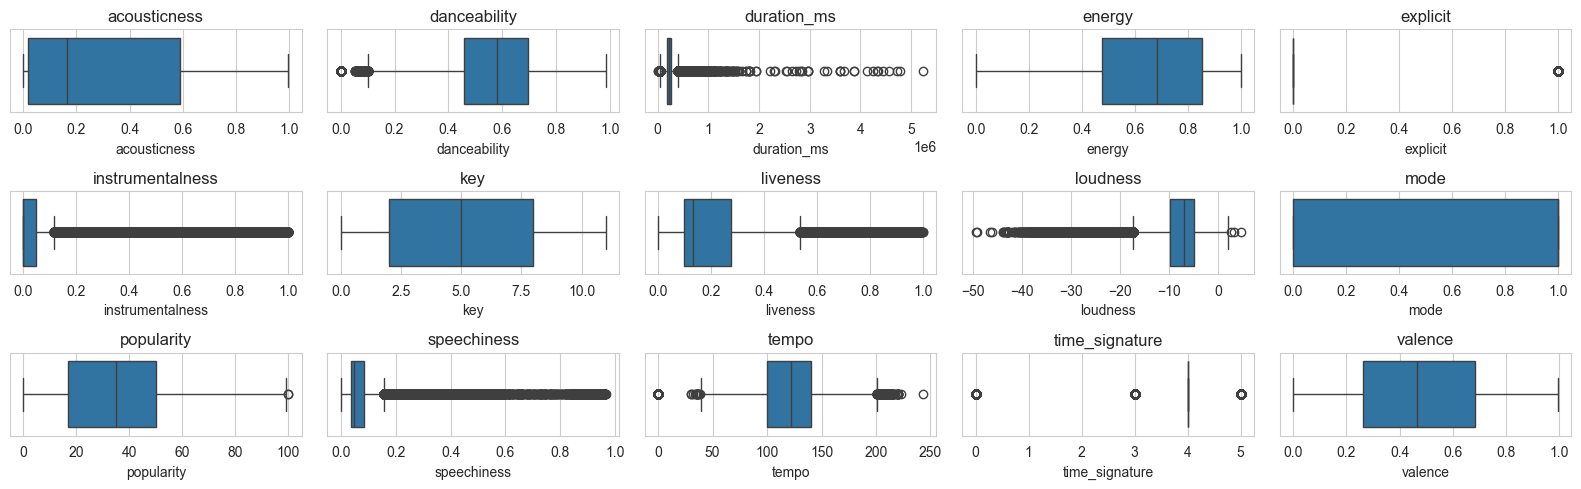

In [11]:
fig, axs = plt.subplots(3, 5, figsize = (16, 5))
axs = axs.flatten()

num_features = df.select_dtypes(exclude='object').columns

i = 0
for feature in sorted(num_features):
    sns.boxplot(data = df, x = feature, ax = axs[i])
    axs[i].set_title(f"{feature}")
    i += 1
plt.tight_layout()

In [12]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,112582.000000,1.125820e+05,112582.000000,112582.000000,112582.000000,112582.000000,112582.000000,112582.000000,112582.000000,112582.000000,112582.000000,112582.000000,112582.000000,112582.000000
mean,33.359605,2.282482e+05,0.568268,0.643641,5.312563,-8.203879,0.637624,0.084313,0.311711,0.154416,0.213335,0.475419,122.295702,3.929163
std,22.301040,1.061059e+05,0.172818,0.249948,3.561017,4.965336,0.480689,0.104337,0.330503,0.307993,0.190106,0.258960,29.956014,0.339499
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.745000e+05,0.458000,0.476000,2.000000,-9.953000,0.000000,0.035900,0.016600,0.000000,0.097900,0.261000,99.635750,4.000000
50%,35.000000,2.131200e+05,0.581000,0.686000,5.000000,-6.975000,1.000000,0.048900,0.166000,0.000041,0.132000,0.465000,122.050000,4.000000
75%,50.000000,2.616400e+05,0.695000,0.854000,8.000000,-4.992000,1.000000,0.084500,0.589000,0.046400,0.273000,0.684000,140.100500,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [13]:
## removing all songs with popularity score == 0
## removing all songs with popularity score == 0
## removing all songs with tempo == 0

mask1 = df['popularity'] != 0
mask2 = df['danceability'] != 0
mask3 = df['tempo'] != 0

original_shape = df.shape[0]
df = df[mask1 & mask2 & mask3]
print(f"{original_shape - df.shape[0]} rows dropped")

15870 rows dropped


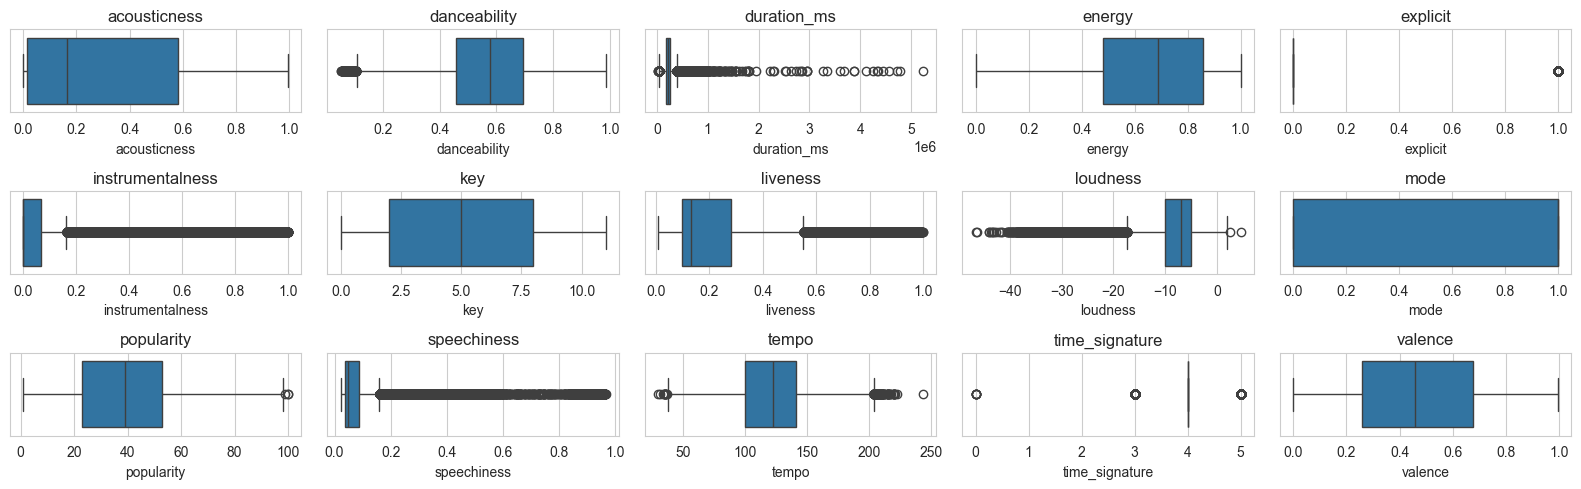

In [14]:
fig, axs = plt.subplots(3, 5, figsize = (16, 5))
axs = axs.flatten()

num_features = df.select_dtypes(exclude='object').columns

i = 0
for feature in sorted(num_features):
    sns.boxplot(data = df, x = feature, ax = axs[i])
    axs[i].set_title(f"{feature}")
    i += 1
plt.tight_layout()

In [15]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,96712.000000,9.671200e+04,96712.000000,96712.000000,96712.000000,96712.000000,96712.000000,96712.000000,96712.000000,96712.000000,96712.000000,96712.000000,96712.000000,96712.000000
mean,38.773379,2.306730e+05,0.567932,0.648443,5.308173,-8.192676,0.634172,0.086119,0.307697,0.162376,0.217292,0.470720,123.009360,3.937691
std,19.199100,1.082463e+05,0.170645,0.248113,3.552991,4.882616,0.481664,0.108638,0.327902,0.313862,0.194970,0.257878,29.565504,0.300938
min,1.000000,2.426600e+04,0.051300,0.000020,0.000000,-46.591000,0.000000,0.022100,0.000000,0.000000,0.009250,0.000000,30.322000,0.000000
25%,23.000000,1.760000e+05,0.459000,0.480000,2.000000,-9.990000,0.000000,0.035900,0.014500,0.000000,0.098400,0.257000,99.988000,4.000000
50%,39.000000,2.156960e+05,0.579000,0.689000,5.000000,-7.038000,1.000000,0.049100,0.164000,0.000057,0.133000,0.457000,122.975000,4.000000
75%,53.000000,2.655110e+05,0.694000,0.859000,8.000000,-5.014000,1.000000,0.085700,0.581000,0.065500,0.280000,0.677000,141.475500,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


# EDA

## Genre Summary

In [16]:
tmp = df['track_genre'].value_counts().reset_index()
tmp.columns = ['genre', 'count']
tmp = tmp.sort_values(by = 'count', ascending = False)
tmp

,genre,count
0,detroit-techno,996
1,forro,996
2,breakbeat,995
3,j-idol,995
4,sertanejo,994
...,...,...
109,latin,404
110,soul,387
111,romance,335
112,iranian,333


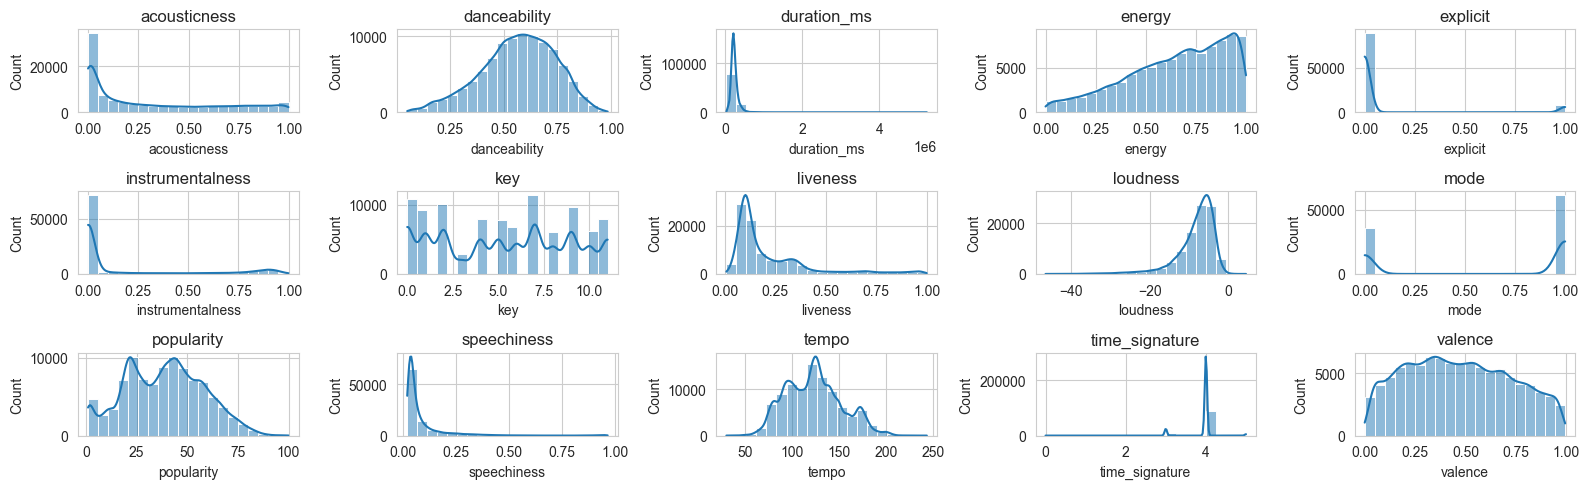

In [17]:
fig, axs = plt.subplots(3, 5, figsize = (16, 5))
axs = axs.flatten()

num_features = df.select_dtypes(exclude='object').columns

i = 0
for feature in sorted(num_features):
    sns.histplot(df[feature], bins = 20, ax = axs[i], kde = True)
    axs[i].set_title(f"{feature}")
    i += 1
plt.tight_layout()

## Correlation map

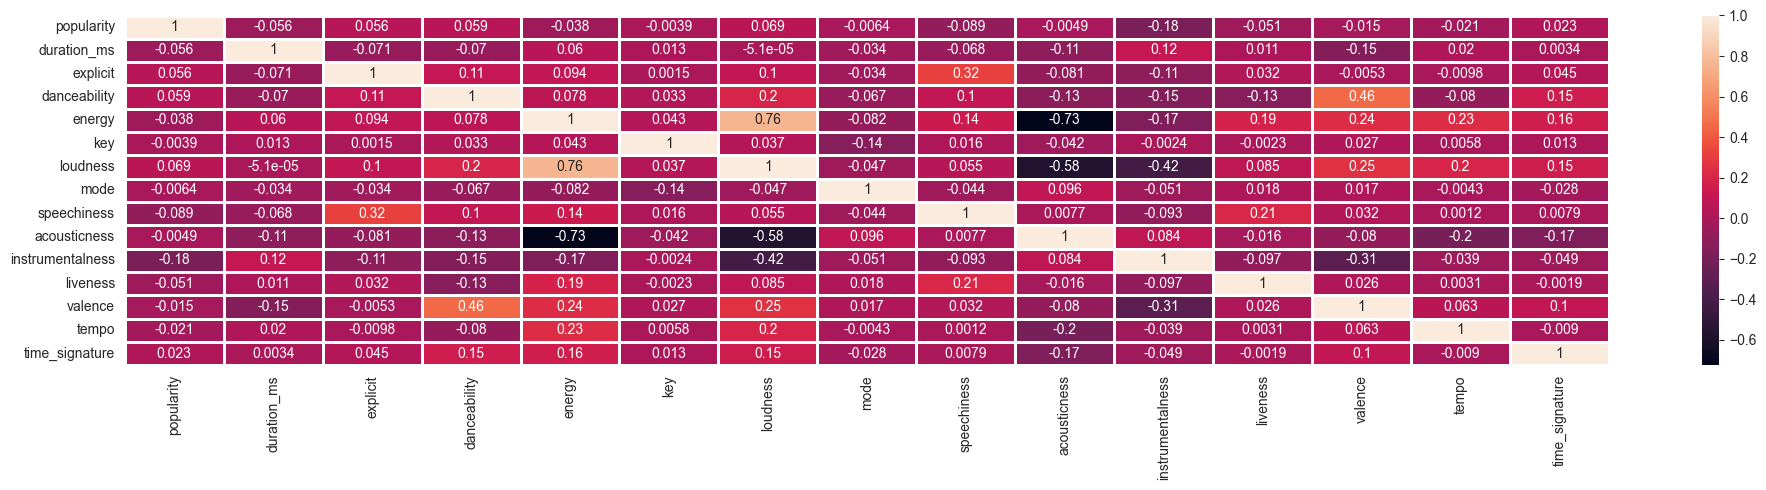

In [18]:
plt.figure(figsize = (20, 5))
sns.heatmap(df.corr(numeric_only=True), annot = True, linewidths=2)
plt.tight_layout()

## Popularity correlation

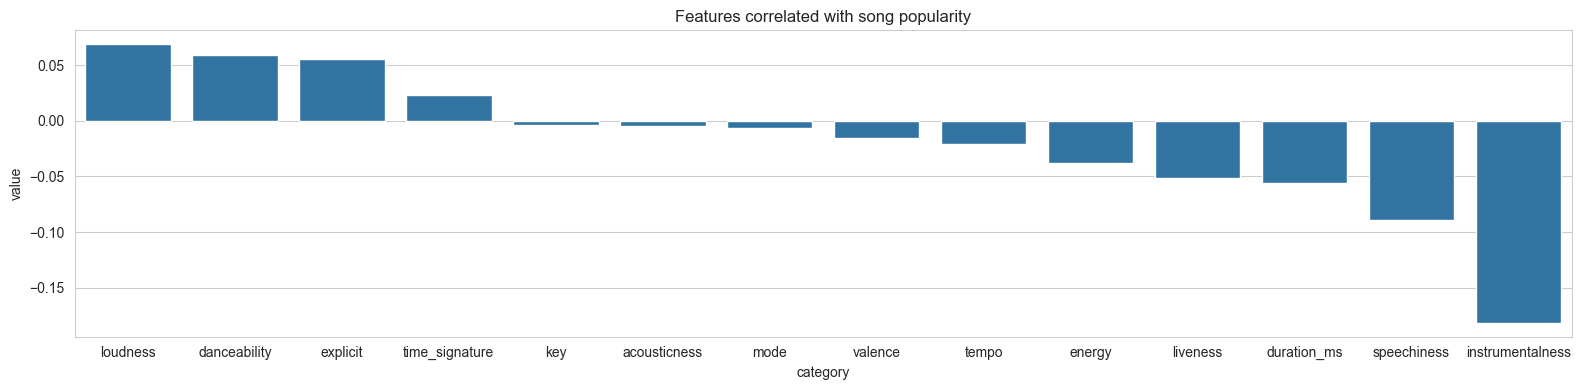

In [19]:
plt.figure(figsize = (16, 4))
tmp = df.corr(numeric_only = True)['popularity'].sort_values(ascending = False).reset_index().iloc[1:, :]
tmp.columns = ['category', 'value']
sns.barplot(data = tmp, x = 'category', y = 'value')
plt.title("Features correlated with song popularity")
plt.tight_layout()

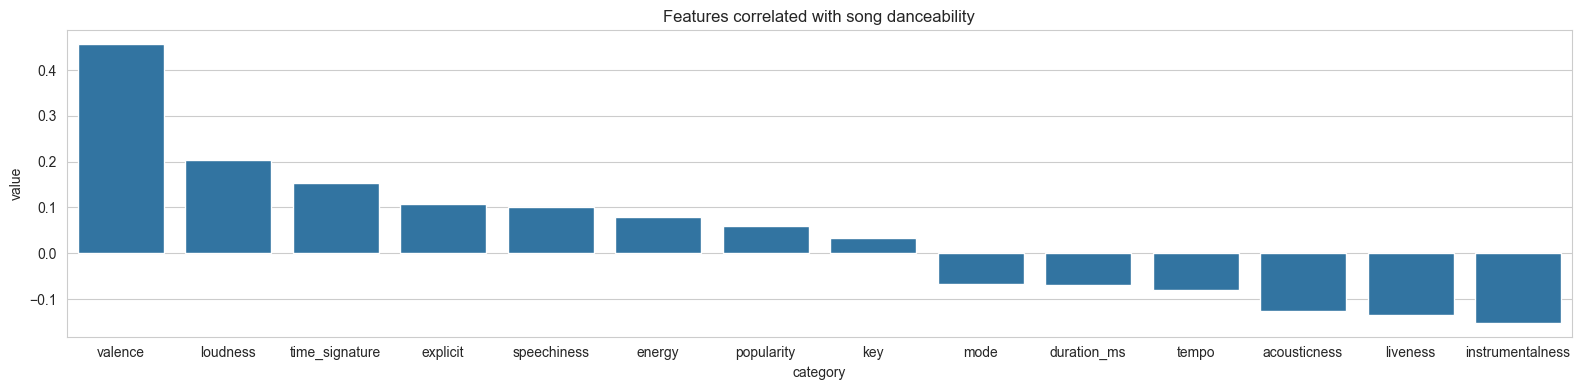

In [20]:
plt.figure(figsize = (16, 4))
tmp = df.corr(numeric_only = True)['danceability'].sort_values(ascending = False).reset_index().iloc[1:, :]
tmp.columns = ['category', 'value']
sns.barplot(data = tmp, x = 'category', y = 'value')
plt.title("Features correlated with song danceability")
plt.tight_layout()

# Feature Analysis

## Popularity Analysis

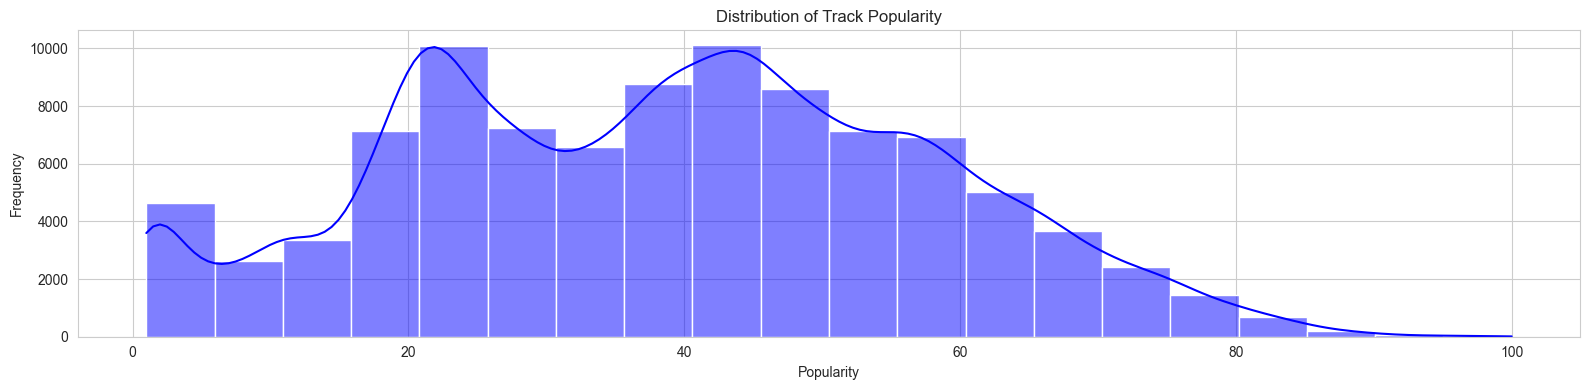

In [21]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 4))

# Create a subplot for the popularity distribution
sns.histplot(df['popularity'], bins=20, kde=True, color='blue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.tight_layout()

### Most popular genres

In [22]:
tmp = df.groupby('track_genre')['popularity'].mean().reset_index().sort_values(by = 'popularity', ascending = False)
avg_popularity = tmp['popularity'].mean()
tmp = tmp[tmp['popularity'] > avg_popularity]
popular_genres = tmp['track_genre'].values

## Danceability Analysis

### Most danceable genres

In [23]:
tmp = df.groupby('track_genre')['danceability'].mean().reset_index().sort_values(by = 'danceability', ascending = False)

avg_danceability = tmp['danceability'].mean()
tmp = tmp[tmp['danceability'] > avg_danceability]
dance_genres = tmp['track_genre'].values

## Overlapping genres: Popular and Danceable

In [24]:
filter_genres = sorted(list(set(dance_genres).intersection(set(popular_genres))))

In [25]:
tmp = df[df['track_genre'].isin(filter_genres)]
tmp.groupby('track_genre')[['danceability','popularity']].mean().reset_index().sort_values(by = "popularity", ascending = False)

,track_genre,danceability,popularity
25,pop-film,0.597841,59.467742
20,k-pop,0.640334,59.316230
24,pop,0.634227,58.812422
8,electro,0.650974,57.970921
16,house,0.667522,57.307047
1,chill,0.664091,55.923480
19,indie-pop,0.600428,55.036835
7,edm,0.648466,55.018957
18,indie,0.599291,54.659058
15,hip-hop,0.715889,53.312945


## Feature Correlations

In [26]:
# Isolate target genre

tmp = df[df['track_genre'] == TARGET_GENRE]

In [27]:
tmp.select_dtypes(exclude ='object').columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

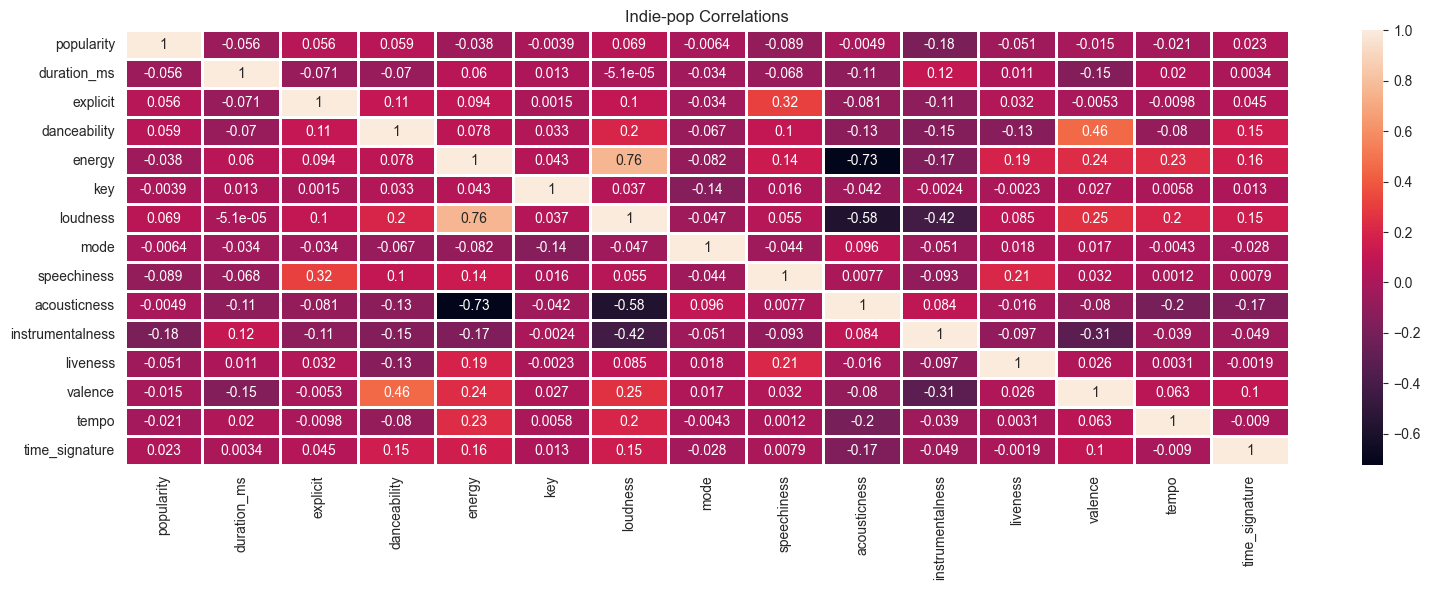

In [28]:
# Calculate and display correlation coefficients
plt.figure(figsize =(16, 6))

correlations = df[tmp.select_dtypes(exclude ='object').columns].corr()
sns.heatmap(correlations, annot = True, linewidths=2)
plt.title(f"{TARGET_GENRE.capitalize()} Correlations")
plt.tight_layout()

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(18, 12))

# List of features to compare with danceability
features = ['energy', 'valence', 'tempo', 'loudness']

# Create scatter plots to visualize the relationship between danceability and each feature
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.regplot(x=df['danceability'], y=df[feature], line_kws={'color':'red'})
    plt.title(f'Danceability vs {feature.capitalize()}')
    plt.xlabel('Danceability')
    plt.ylabel(feature.capitalize())

plt.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(3, 5, figsize = (16, 5))
axs = axs.flatten()

num_features = df.select_dtypes(exclude='object').columns

i = 0
for feature in sorted(num_features):
    sns.histplot(tmp[feature], bins = 20, ax = axs[i], kde = True)
    axs[i].set_title(f"{feature}")
    i += 1
fig.suptitle(f"{TARGET_GENRE.capitalize()} feature distributions")
plt.tight_layout()

# Track Filtering

In [ ]:
tmp['popularity'].median()

In [ ]:
# filter out all songs with popularity below certain threshold
pop_threshold = 0.60
dance_threshold = 0.60

pop_threshold = tmp['popularity'].quantile(pop_threshold)
tmp2 = tmp[(tmp['popularity'] > pop_threshold) & (tmp['danceability'] > dance_threshold)]

tmp2 = tmp2.reset_index(drop = True)
print(tmp2.shape)

In [ ]:
track_df = tmp2.groupby(['artists','track_name'])['track_id'].first().reset_index()['track_id']
tmp2 = pd.merge(track_df, tmp2, on = 'track_id', how = 'left')
tmp2.shape

# Playlist building

In [ ]:
# Assume 'data' is your DataFrame containing the track features
features = tmp2[['danceability', 'energy', 'tempo', 'valence', 'popularity']]

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

ks = np.arange(2, 10)

data = []
for k in ks:
    # Apply K-means clustering
    kmeans = KMeans(n_init = 'auto', init = 'k-means++', n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    data.append(kmeans.inertia_)
    #tmp['cluster'] = kmeans.fit_predict(features_scaled)

# Plotting the results onto a line graph
plt.figure(figsize=(10,6))
plt.plot(ks, data, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.grid(True)
plt.show()

In [ ]:
# Create new clusters

n_clusters = 5
kmeans = KMeans(n_init = 'auto', n_clusters=n_clusters)
labels = kmeans.fit_predict(features_scaled)
tmp2['group'] = labels

In [ ]:
tmp3 = tmp2['group'].value_counts().reset_index()
tmp3.columns = ['Group', 'Count']
sns.barplot(data = tmp3, x = 'Group', y = 'Count')
plt.tight_layout()

In [ ]:
fig = px.scatter(tmp2, x='danceability', 
                 y='popularity', 
                 color = 'group',
                 hover_name='track_name',
                 #labels={'danceability': 'Danceability', 'energy': 'Energy'},
                 title='Genre-Specific Danceability and Popularity')
fig.update_layout(height = 700)
fig.show()

In [ ]:
fig, axs = plt.subplots(3, 5, figsize = (16, 5))
axs = axs.flatten()

num_features = df.select_dtypes(exclude='object').columns

i = 0
for feature in sorted(num_features):
    sns.histplot(tmp2[feature], bins = 20, ax = axs[i], kde = True)
    axs[i].set_title(f"{feature}")
    i += 1
fig.suptitle(f"{TARGET_GENRE.capitalize()} feature distributions")
plt.tight_layout()

# Playlist creation

## Final selection

In [ ]:
print(f"{tmp2.shape[0]} songs to choose from")

In [ ]:
groups = sorted(tmp2['group'].unique())
data = []
for group in groups:
    tmp3 = tmp2[tmp2['group'] == group]
    data.append(tmp3.sample(5, replace = False))

In [ ]:
playlist = pd.concat(data).reset_index(drop = True).sample(frac = 1).reset_index(drop = True)
playlist

In [ ]:
plt.figure(figsize = (16, 4))
sns.lineplot(data = playlist, x = playlist.index, y = 'danceability')
plt.title("Danceabilty of playlist in chronological order")
plt.xlabel("track")
plt.tight_layout()

## Export playlist

In [ ]:
playlist.to_excel(f"{TARGET_GENRE}_playlist_2024.xlsx")